In [22]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [23]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

In [0]:
np.random.seed(0)

In [26]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data=pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
  val_data=pickle.load(f)
with open('german-traffic-signs/test.p','rb') as f:
  test_data=pickle.load(f)
print(type(train_data))
X_train,y_train=train_data['features'],train_data['labels']
X_val,y_val=val_data['features'],val_data['labels']
X_test,y_test=test_data['features'],test_data['labels']

<class 'dict'>


In [27]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [0]:
assert(X_train.shape[0]==y_train.shape[0]),"The number of images in not equal to number of labels"
assert(X_val.shape[0]==y_val.shape[0]),"The number of images in not equal to number of labels"
assert(X_test.shape[0]==y_test.shape[0]),"The number of images in not equal to number of labels"
assert(X_train.shape[1:]==(32,32,3)),"The images are not 32x32x3"
assert(X_val.shape[1:]==(32,32,3)),"The images are not 32x32x3"
assert(X_test.shape[1:]==(32,32,3)),"The images are not 32x32x3"




In [29]:
data=pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

IndexError: ignored

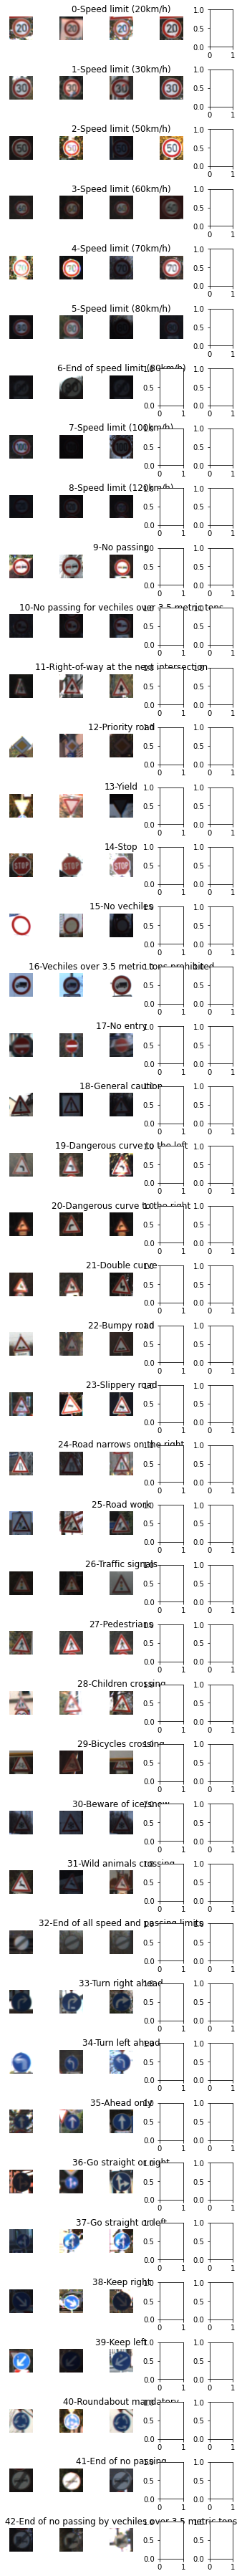

In [30]:
data=pd.read_csv('german-traffic-signs/signnames.csv')
num_of_samples = []
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+"-"+row["SignName"])
            num_of_samples.append(len(x_selected))


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

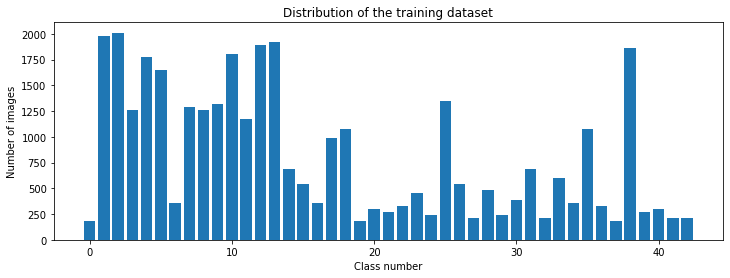

In [32]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)
36


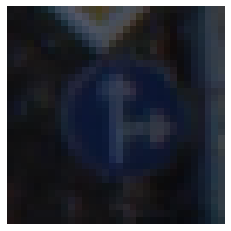

In [33]:
import cv2
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


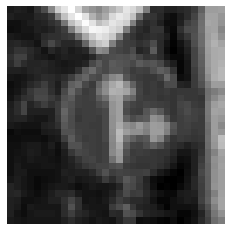

In [34]:
def grayscale(img):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img
img=grayscale(X_train[1000])
plt.imshow(img, cmap=plt.get_cmap("gray"))
plt.axis("off")
print(img.shape)

(32, 32)


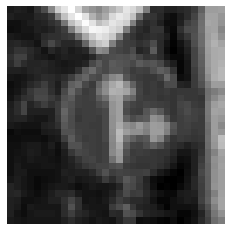

In [35]:
def equalize(img):
  img=cv2.equalizeHist(img)
  return img
image=equalize(img)
plt.imshow(img, cmap=plt.get_cmap("gray"))
plt.axis("off")
print(img.shape)

In [0]:
def preprocessing(img):
  img=grayscale(img)
  img=equalize(img)
  img=img/255
  return img
X_train=np.array(list(map(preprocessing,X_train)))
X_val=np.array(list(map(preprocessing,X_val)))
X_test=np.array(list(map(preprocessing,X_test)))

(34799, 32, 32)


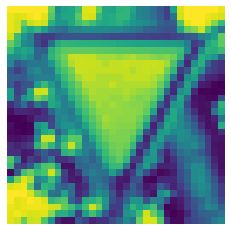

In [37]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis("off")
print(X_train.shape)

In [0]:
X_train=X_train.reshape(34799,32,32,1)
X_test=X_test.reshape(12630,32,32,1)
X_val=X_val.reshape(4410,32,32,1)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)
datagen.fit(X_train)

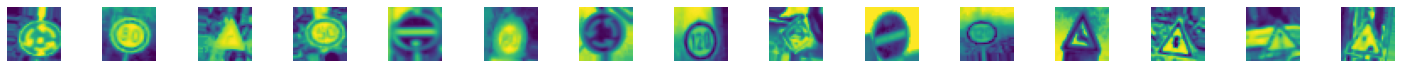

In [102]:
batches=datagen.flow(X_train,y_train,batch_size=20)
X_batch,y_batch=next(batches)
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32,32))
  axs[i].axis('off')

In [39]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [0]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)
y_val=to_categorical(y_val,43)


In [0]:
def modified_model():
  model=Sequential()
  model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu'))
  model.add(Conv2D(60,(5,5),activation='relu'))

  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(Conv2D(30,(3,3),activation='relu'))

  model.add(MaxPooling2D(pool_size=(2,2)))
 # model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model



In [106]:
model=modified_model()
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 480)              

In [107]:
history=model.fit_generator(datagen.flow(X_train,y_train,batch_size=50),steps_per_epoch=2000,epochs=10,validation_data=(X_val,y_val),shuffle=1)

Epoch 1/10
2000/2000 [==============================] - 48s 24ms/step - loss: 0.9205 - accuracy: 0.7313 - val_loss: 0.0859 - val_accuracy: 0.9778
Epoch 2/10
2000/2000 [==============================] - 47s 24ms/step - loss: 0.2050 - accuracy: 0.9360 - val_loss: 0.0485 - val_accuracy: 0.9880
Epoch 3/10
2000/2000 [==============================] - 48s 24ms/step - loss: 0.1417 - accuracy: 0.9559 - val_loss: 0.0824 - val_accuracy: 0.9834
Epoch 4/10
2000/2000 [==============================] - 48s 24ms/step - loss: 0.1079 - accuracy: 0.9660 - val_loss: 0.0364 - val_accuracy: 0.9905
Epoch 5/10
2000/2000 [==============================] - 48s 24ms/step - loss: 0.0913 - accuracy: 0.9719 - val_loss: 0.0323 - val_accuracy: 0.9912
Epoch 6/10
2000/2000 [==============================] - 48s 24ms/step - loss: 0.0803 - accuracy: 0.9757 - val_loss: 0.0306 - val_accuracy: 0.9921
Epoch 7/10
2000/2000 [==============================] - 48s 24ms/step - loss: 0.0766 - accuracy: 0.9768 - val_loss: 0.0500 -

Text(0.5, 0, 'epoch')

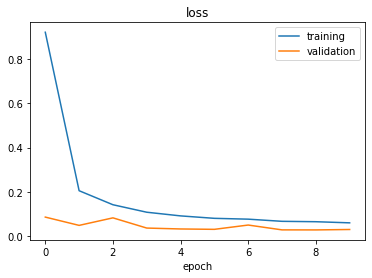

In [108]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

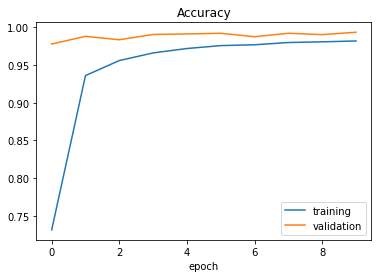

In [109]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [110]:
score=model.evaluate(X_test,y_test,verbose=0)
print('Test Score',score[0])
print('Test Accuracy',score[1])

Test Score 0.10774803196958477
Test Accuracy 0.974901020526886


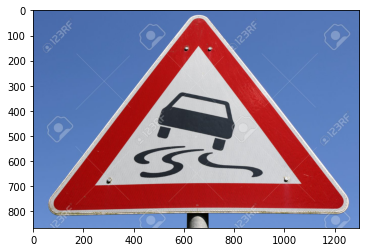

In [123]:
import requests
from PIL import Image
url = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


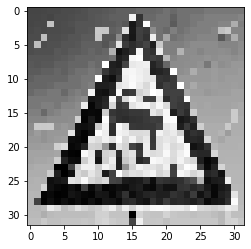

In [124]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [0]:
img=img.reshape(1,32,32,1)

In [126]:
print("predicted sign: "+str(model.predict_classes(img)))

predicted sign: [23]


In [65]:
pip install -U keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)
